<a href="https://colab.research.google.com/github/greedilearner/greedilearner.github.io/blob/main/Implementing_Image_Classification_Using_the_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
fashion_minst=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_minst
X_train,y_train =X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8449 - loss: 0.4216 - val_accuracy: 0.8340 - val_loss: 0.4739
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8516 - loss: 0.4060 - val_accuracy: 0.8358 - val_loss: 0.4683
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8564 - loss: 0.3912 - val_accuracy: 0.8394 - val_loss: 0.4612
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8600 - loss: 0.3791 - val_accuracy: 0.8412 - val_loss: 0.4563
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8645 - loss: 0.3675 - val_accuracy: 0.8446 - val_loss: 0.4507
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8685 - loss: 0.3569 - val_accuracy: 0.8438 - val_loss: 0.4523
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8718 - loss: 0.3479 - val_accuracy: 0.8460 - val_loss: 0.4516
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8741 - loss: 0.339

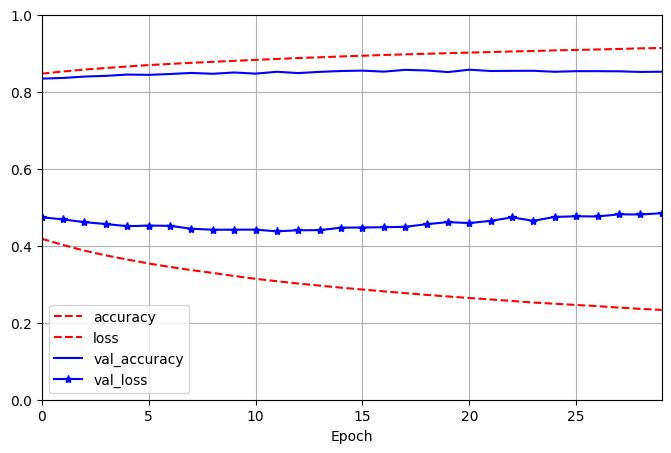

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel="Epoch",style=["r--","r--","b-","b-*"])
plt.show()


In [24]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8491 - loss: 0.5227


[0.5227645039558411, 0.8476999998092651]

In [25]:
X_new = X_test[:3]
y_prob= model.predict(X_new)
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
import numpy as np
y_pred = y_prob.argmax(axis=-1)
y_pred


array([9, 2, 1])